# Bank Loan Status Dataset
#### Intro

- In this notebook, we will try to predict the eventual outcome of a loan.
<br><br>
- Conventionaly, it is done using logistic regression. A big advantage of it is the ease of interpretation. In fact, monotonicity is often required when building a prediction model. Nonetheless, we elect to use LightGBM in this particular notebook.
<br><br>
- The full dataset can be found from:
    - https://www.kaggle.com/datasets/zaurbegiev/my-dataset?datasetId=1088
----

In [294]:
import numpy as np
import pandas as pd

pd.options.display.max_columns = None
pd.options.display.max_rows = None

df_raw = pd.read_csv("./credit_train.csv")
print("First 10 obs")
display(df_raw.head(10))
print("")
print(f"Shape of the dataset is {df_raw.shape}")
print("")
print("Info of the dataset")
df_raw.info()
print("")
print("Description of the dataset")
df_raw.describe()

First 10 obs


Loan ID                           Customer ID  \
0  14dd8831-6af5-400b-83ec-68e61888a048  981165ec-3274-42f5-a3b4-d104041a9ca9   
1  4771cc26-131a-45db-b5aa-537ea4ba5342  2de017a3-2e01-49cb-a581-08169e83be29   
2  4eed4e6a-aa2f-4c91-8651-ce984ee8fb26  5efb2b2b-bf11-4dfd-a572-3761a2694725   
3  77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a  e777faab-98ae-45af-9a86-7ce5b33b1011   
4  d4062e70-befa-4995-8643-a0de73938182  81536ad9-5ccf-4eb8-befb-47a4d608658e   
5  89d8cb0c-e5c2-4f54-b056-48a645c543dd  4ffe99d3-7f2a-44db-afc1-40943f1f9750   
6  273581de-85d8-4332-81a5-19b04ce68666  90a75dde-34d5-419c-90dc-1e58b04b3e35   
7  db0dc6e1-77ee-4826-acca-772f9039e1c7  018973c9-e316-4956-b363-67e134fb0931   
8  8af915d9-9e91-44a0-b5a2-564a45c12089  af534dea-d27e-4fd6-9de8-efaa52a78ec0   
9  0b1c4e3d-bd97-45ce-9622-22732fcdc9a0  235c4a43-dadf-483d-aa44-9d6d77ae4583   

   Loan Status  Current Loan Amount        Term  Credit Score  Annual Income  \
0   Fully Paid             445412.0  Short Term         709.0      1167493.0   
1   Fully Paid             262328.0  Short Term           NaN            NaN   
2   Fully Paid           99999999.0  Short Term         741.0      2231892.0   
3   Fully Paid             347666.0   Long Term         721.0       806949.0   
4   Fully Paid             176220.0  Short Term           NaN            NaN   
5  Charged Off             206602.0  Short Term        7290.0       896857.0   
6   Fully Paid             217646.0  Short Term         730.0      1184194.0   
7  Charged Off             648714.0   Long Term           NaN            NaN   
8   Fully Paid             548746.0  Short Term         678.0      2559110.0   
9   Fully Paid             215952.0  Short Term         739.0      1454735.0   

  Years in current job Home Ownership             Purpose  Monthly Debt  \
0              8 years  Home Mortgage   Home Improvements       5214.74   
1            10+ years  Home Mortgage  Debt Consolidation      33295.98   
2              8 years       Own Home  Debt Consolidation      29200.53   
3              3 years       Own Home  Debt Consolidation       8741.90   
4              5 years           Rent  Debt Consolidation      20639.70   
5            10+ years  Home Mortgage  Debt Consolidation      16367.74   
6             < 1 year  Home Mortgage  Debt Consolidation      10855.08   
7             < 1 year  Home Mortgage           Buy House      14806.13   
8              2 years           Rent  Debt Consolidation      18660.28   
9             < 1 year           Rent  Debt Consolidation      39277.75   

   Years of Credit History  Months since last delinquent  \
0                     17.2                           NaN   
1                     21.1                           8.0   
2                     14.9                          29.0   
3                     12.0                           NaN   
4                      6.1                           NaN   
5                     17.3                           NaN   
6                     19.6                          10.0   
7                      8.2                           8.0   
8                     22.6                          33.0   
9                     13.9                           NaN   

   Number of Open Accounts  Number of Credit Problems  Current Credit Balance  \
0                      6.0                        1.0                228190.0   
1                     35.0                        0.0                229976.0   
2                     18.0                        1.0                297996.0   
3                      9.0                        0.0                256329.0   
4                     15.0                        0.0                253460.0   
5                      6.0                        0.0                215308.0   
6                     13.0                        1.0                122170.0   
7                     15.0                        0.0                193306.0   
8                      4.0                 


Shape of the dataset is (100514, 19)

Info of the dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  float64
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   object 
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of Credit History       100000 non-null

Current Loan Amount  Credit Score  Annual Income   Monthly Debt  \
count         1.000000e+05  80846.000000   8.084600e+04  100000.000000   
mean          1.176045e+07   1076.456089   1.378277e+06   18472.412336   
std           3.178394e+07   1475.403791   1.081360e+06   12174.992609   
min           1.080200e+04    585.000000   7.662700e+04       0.000000   
25%           1.796520e+05    705.000000   8.488440e+05   10214.162500   
50%           3.122460e+05    724.000000   1.174162e+06   16220.300000   
75%           5.249420e+05    741.000000   1.650663e+06   24012.057500   
max           1.000000e+08   7510.000000   1.655574e+08  435843.280000   

       Years of Credit History  Months since last delinquent  \
count            100000.000000                  46859.000000   
mean                 18.199141                     34.901321   
std                   7.015324                     21.997829   
min                   3.600000                      0.000000   
25%                  13.500000                     16.000000   
50%                  16.900000                     32.000000   
75%                  21.700000                     51.000000   
max                  70.500000                    176.000000   

       Number of Open Accounts  Number of Credit Problems  \
count             100000.00000              100000.000000   
mean                  11.12853                   0.168310   
std                    5.00987                   0.482705   
min                    0.00000                   0.000000   
25%                    8.00000                   0.000000   
50%                   10.00000                   0.000000   
75%                   14.00000                   0.000000   
max                   76.00000                  15.000000   

       Current Credit Balance  Maximum Open Credit  Bankruptcies     Tax Liens  
count            1.000000e+05         9.999800e+04  99796.000000  99990.000000  
mean             2.946374e+05         7.607984e+05      0.117740      0.029313  
std              3.761709e+05         8.384503e+06      0.351424      0.258182  
min              0.000000e+00         0.000000e+00      0.000000      0.000000  
25%              1.126700e+05         2.734380e+05      0.000000      0.000000  
50%              2.098170e+05         4.678740e+05      0.000000      0.000000  
75%              3.679588e+05         7.829580e+05      0.000000      0.000000  
max              3.287897e+07         1.539738e+09      7.000000     15.000000

We also are interested in the values each variable can take on.

In [295]:
for col in df_raw:
    print(col)
    print(df_raw[col].sort_values().unique())
    print("")

Loan ID
['0000757f-a121-41ed-b17b-162e76647c1f'
 '0000afa6-8902-4f8f-b870-25a8fdad0aeb'
 '00020fb0-6b8a-4b3a-8c72-9c4c847e8cb6' ...
 'ffffca93-aa8c-4123-b8ff-7852f6df889a'
 'ffffe32e-ed17-459f-9cfd-7b9ee7972933' nan]

Customer ID
['00003c89-d86a-48a2-9f95-e1ec9d488ee1'
 '0002005f-3575-462e-bb81-714530e8e752'
 '00024ad3-b367-44e3-81ff-4bee18ed00b4' ...
 'ffff1be7-7ce4-479a-9eda-6adf354b768d'
 'ffff6cf8-4779-48be-9fc1-5a93b6e16c2d' nan]

Loan Status
['Charged Off' 'Fully Paid' nan]

Current Loan Amount
[1.0802000e+04 1.1242000e+04 1.5422000e+04 ... 7.8925000e+05 9.9999999e+07
           nan]

Term
['Long Term' 'Short Term' nan]

Credit Score
[ 585.  586.  587.  588.  589.  590.  591.  592.  593.  594.  595.  596.
  597.  598.  599.  600.  601.  602.  603.  604.  605.  606.  607.  608.
  609.  610.  611.  612.  613.  614.  615.  616.  617.  618.  619.  620.
  621.  622.  623.  624.  625.  626.  627.  628.  629.  630.  631.  632.
  633.  634.  635.  636.  637.  638.  639.  640.  641.  642.

Observations:

- $Years_in_current_job is better represented as numbers rather than strings. Same for $Loan_Status. Also cast object data as category as LightGBM does not accept object data input.
- $Current_Loan_Amount of $99,999,999 looks suspicious.
- $Credit_Score are either in the range 585-750 or above 5850. It is apparent that some have been factored by 10 due to poor data quality.

We shall address these discoveries in sequential order.

In [296]:
year_mapping = {'< 1 year':0,
                '1 year':1,
                '2 years':2,
                '3 years':3,
                '4 years':4,
                '5 years':5,
                '6 years':6,
                '7 years':7,
                '8 years':8,
                '9 years':9,
                '10+ years':10}

df_raw['Years in current job'] = df_raw['Years in current job'].map(year_mapping).astype('float')

status_mapping = {'Fully Paid':0,
                  'Charged Off':1}

df_raw['Loan Status'] = df_raw['Loan Status'].map(status_mapping).astype('float')

df_raw[['Term', 'Home Ownership', 'Purpose']] = df_raw[['Term', 'Home Ownership', 'Purpose']].astype('category')

df_raw.head()

Loan ID                           Customer ID  \
0  14dd8831-6af5-400b-83ec-68e61888a048  981165ec-3274-42f5-a3b4-d104041a9ca9   
1  4771cc26-131a-45db-b5aa-537ea4ba5342  2de017a3-2e01-49cb-a581-08169e83be29   
2  4eed4e6a-aa2f-4c91-8651-ce984ee8fb26  5efb2b2b-bf11-4dfd-a572-3761a2694725   
3  77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a  e777faab-98ae-45af-9a86-7ce5b33b1011   
4  d4062e70-befa-4995-8643-a0de73938182  81536ad9-5ccf-4eb8-befb-47a4d608658e   

   Loan Status  Current Loan Amount        Term  Credit Score  Annual Income  \
0          0.0             445412.0  Short Term         709.0      1167493.0   
1          0.0             262328.0  Short Term           NaN            NaN   
2          0.0           99999999.0  Short Term         741.0      2231892.0   
3          0.0             347666.0   Long Term         721.0       806949.0   
4          0.0             176220.0  Short Term           NaN            NaN   

   Years in current job Home Ownership             Purpose  Monthly Debt  \
0                   8.0  Home Mortgage   Home Improvements       5214.74   
1                  10.0  Home Mortgage  Debt Consolidation      33295.98   
2                   8.0       Own Home  Debt Consolidation      29200.53   
3                   3.0       Own Home  Debt Consolidation       8741.90   
4                   5.0           Rent  Debt Consolidation      20639.70   

   Years of Credit History  Months since last delinquent  \
0                     17.2                           NaN   
1                     21.1                           8.0   
2                     14.9                          29.0   
3                     12.0                           NaN   
4                      6.1                           NaN   

   Number of Open Accounts  Number of Credit Problems  Current Credit Balance  \
0                      6.0                        1.0                228190.0   
1                     35.0                        0.0                229976.0   
2                     18.0                        1.0                297996.0   
3                      9.0                        0.0                256329.0   
4                     15.0                        0.0                253460.0   

   Maximum Open Credit  Bankruptcies  Tax Liens  
0             416746.0           1.0        0.0  
1             850784.0           0.0        0.0  
2             750090.0           0.0        0.0  
3             386958.0           0.0        0.0  
4             427174.0           0.0        0.0

In [297]:
df_raw[df_raw['Current Loan Amount'] == 99999999].head()

Loan ID  \
2   4eed4e6a-aa2f-4c91-8651-ce984ee8fb26   
10  32c2e48f-1ba8-45e0-a530-9a6622c18d9c   
12  403d7235-0284-4bb6-919a-09402fecbf7b   
13  01d878ae-efa2-41e2-8159-6c834ff09f47   
26  0c14cb77-29a3-4964-9198-0c43f5f982b0   

                             Customer ID  Loan Status  Current Loan Amount  \
2   5efb2b2b-bf11-4dfd-a572-3761a2694725          0.0           99999999.0   
10  0de7bcdb-ebf4-4608-ba39-05f083f855b6          0.0           99999999.0   
12  11581f68-de3c-49d8-80d9-22268ebb323b          0.0           99999999.0   
13  900c9191-2c20-4688-af7e-07c59b5d5a24          0.0           99999999.0   
26  9baf6d5d-f744-4332-abb0-e939b75cde40          0.0           99999999.0   

          Term  Credit Score  Annual Income  Years in current job  \
2   Short Term         741.0      2231892.0                   8.0   
10  Short Term         728.0       714628.0                   3.0   
12  Short Term         740.0       776188.0                   0.0   
13  Short Term         743.0      1560907.0                   4.0   
26  Short Term         724.0      1029857.0                   1.0   

   Home Ownership             Purpose  Monthly Debt  Years of Credit History  \
2        Own Home  Debt Consolidation      29200.53                     14.9   
10           Rent  Debt Consolidation      11851.06                     16.0   
12       Own Home  Debt Consolidation      11578.22                      8.5   
13           Rent  Debt Consolidation      17560.37                     13.3   
26           Rent  Debt Consolidation      13817.18                     12.0   

    Months since last delinquent  Number of Open Accounts  \
2                           29.0                     18.0   
10                          76.0                     16.0   
12                          25.0                      6.0   
13                           NaN                     10.0   
26                           NaN                      6.0   

    Number of Credit Problems  Current Credit Balance  Maximum Open Credit  \
2                         1.0                297996.0             750090.0   
10                        0.0                203965.0             289784.0   
12                        0.0                134083.0             220220.0   
13                        1.0                225549.0             496474.0   
26                        0.0                138339.0             221232.0   

    Bankruptcies  Tax Liens  
2            0.0        0.0  
10           0.0        0.0  
12           0.0        0.0  
13           1.0        0.0  
26           0.0        0.0

It seems that $99,999,999 loans are mostly consolidation loans.

In [298]:
df_raw[df_raw['Current Loan Amount'] == 99999999]['Loan Status'].unique()

array([0.])

It appears that $99,999,999 loans cannot be charged-off. We shall exclude these obs from our analysis.

In [299]:
df_raw = df_raw[df_raw['Current Loan Amount'] != 99999999]
df_raw.shape

(89030, 19)

Next, we rectify the credit scores that are above 5000.

In [300]:
df_raw['Credit Score'] = np.where(df_raw['Credit Score'] > 1000, df_raw['Credit Score'] / 10, df_raw['Credit Score'])
df_raw['Credit Score'].unique()

array([709.,  nan, 721., 729., 730., 678., 739., 727., 723., 747., 687.,
       750., 714., 724., 704., 688., 749., 733., 725., 745., 720., 718.,
       682., 712., 680., 737., 710., 598., 719., 661., 652., 736., 738.,
       644., 672., 741., 699., 751., 694., 675., 657., 748., 743., 666.,
       742., 705., 731., 624., 685., 717., 722., 618., 676., 692., 740.,
       746., 732., 649., 695., 744., 686., 637., 697., 706., 715., 707.,
       716., 702., 651., 708., 698., 689., 735., 703., 693., 645., 691.,
       673., 700., 658., 728., 674., 654., 681., 696., 668., 659., 647.,
       683., 670., 623., 711., 639., 671., 614., 713., 667., 701., 734.,
       615., 656., 653., 664., 613., 726., 636., 594., 646., 669., 690.,
       641., 665., 677., 684., 655., 630., 663., 638., 596., 660., 679.,
       609., 603., 643., 633., 586., 629., 648., 640., 625., 635., 662.,
       627., 611., 604., 642., 621., 632., 602., 616., 600., 650., 597.,
       610., 619., 628., 599., 606., 608., 620., 62

In [301]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89030 entries, 0 to 100513
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Loan ID                       88516 non-null  object  
 1   Customer ID                   88516 non-null  object  
 2   Loan Status                   88516 non-null  float64 
 3   Current Loan Amount           88516 non-null  float64 
 4   Term                          88516 non-null  category
 5   Credit Score                  69362 non-null  float64 
 6   Annual Income                 69362 non-null  float64 
 7   Years in current job          84722 non-null  float64 
 8   Home Ownership                88516 non-null  category
 9   Purpose                       88516 non-null  category
 10  Monthly Debt                  88516 non-null  float64 
 11  Years of Credit History       88516 non-null  float64 
 12  Months since last delinquent  41728 non-null 

Next, we wish to understand how much data is missing from the dataset.

In [302]:
print("% and count of missing values ")
df_raw.isnull().agg({'mean','sum'}).transpose()

% and count of missing values 


mean      sum
Loan ID                       0.005773    514.0
Customer ID                   0.005773    514.0
Loan Status                   0.005773    514.0
Current Loan Amount           0.005773    514.0
Term                          0.005773    514.0
Credit Score                  0.220914  19668.0
Annual Income                 0.220914  19668.0
Years in current job          0.048388   4308.0
Home Ownership                0.005773    514.0
Purpose                       0.005773    514.0
Monthly Debt                  0.005773    514.0
Years of Credit History       0.005773    514.0
Months since last delinquent  0.531304  47302.0
Number of Open Accounts       0.005773    514.0
Number of Credit Problems     0.005773    514.0
Current Credit Balance        0.005773    514.0
Maximum Open Credit           0.005796    516.0
Bankruptcies                  0.007761    691.0
Tax Liens                     0.005874    523.0

Inspect obs with missing $Loan_Status

In [303]:
df_raw[df_raw['Loan Status'].isna()].head()

Loan ID Customer ID  Loan Status  Current Loan Amount Term  \
100000     NaN         NaN          NaN                  NaN  NaN   
100001     NaN         NaN          NaN                  NaN  NaN   
100002     NaN         NaN          NaN                  NaN  NaN   
100003     NaN         NaN          NaN                  NaN  NaN   
100004     NaN         NaN          NaN                  NaN  NaN   

        Credit Score  Annual Income  Years in current job Home Ownership  \
100000           NaN            NaN                   NaN            NaN   
100001           NaN            NaN                   NaN            NaN   
100002           NaN            NaN                   NaN            NaN   
100003           NaN            NaN                   NaN            NaN   
100004           NaN            NaN                   NaN            NaN   

       Purpose  Monthly Debt  Years of Credit History  \
100000     NaN           NaN                      NaN   
100001     NaN           NaN                      NaN   
100002     NaN           NaN                      NaN   
100003     NaN           NaN                      NaN   
100004     NaN           NaN                      NaN   

        Months since last delinquent  Number of Open Accounts  \
100000                           NaN                      NaN   
100001                           NaN                      NaN   
100002                           NaN                      NaN   
100003                           NaN                      NaN   
100004                           NaN                      NaN   

        Number of Credit Problems  Current Credit Balance  \
100000                        NaN                     NaN   
100001                        NaN                     NaN   
100002                        NaN                     NaN   
100003                        NaN                     NaN   
100004                        NaN                     NaN   

        Maximum Open Credit  Bankruptcies  Tax Liens  
100000                  NaN           NaN        NaN  
100001                  NaN           NaN        NaN  
100002                  NaN           NaN        NaN  
100003                  NaN           NaN        NaN  
100004                  NaN           NaN        NaN

It seems that obs beyond 100000 are irrelevant. We shall exlucde these from our analysis.

In [304]:
df_raw = df_raw[df_raw['Loan Status'].notnull()]
df_raw.shape

(88516, 19)

And deduplicate

In [305]:
df_raw.drop_duplicates(inplace=True)
df_raw.shape

(78301, 19)

Check number of recurring customers

In [306]:
df_recur = df_raw['Customer ID'].value_counts()
df_recur.value_counts()

1    69887
2     4207
Name: Customer ID, dtype: int64

In [307]:
df_recur = df_recur[df_recur == 2]
recurring_cust = df_recur.index
del df_recur
recurring_cust[:5]

Index(['8bad03b4-bf30-4444-bacf-062532e22ae7',
       'f98c03be-ecd6-4c11-9cd9-94afb2f6cbac',
       '3ab5b188-2074-4fb5-b7b8-47cacef7a621',
       '0757c256-23ee-449d-aaca-6d6e7f387156',
       '0b998d2f-fa4e-4dc0-a968-9a0ebcb1ecef'],
      dtype='object')

In [308]:
df_raw[df_raw['Customer ID'].isin(recurring_cust[:5])].sort_values(by = 'Customer ID')

Loan ID  \
28794  9e925c8d-a4e2-4274-8b18-f63aeb0876aa   
61770  9e925c8d-a4e2-4274-8b18-f63aeb0876aa   
40342  1fa196d2-7e24-4642-9ce1-4b124840c1e8   
49890  1fa196d2-7e24-4642-9ce1-4b124840c1e8   
77172  24e57a37-6083-4b31-9753-d347afa891b4   
87333  24e57a37-6083-4b31-9753-d347afa891b4   
45139  c354c8d5-aa7a-404a-bc93-3fa4a6e556c9   
63827  c354c8d5-aa7a-404a-bc93-3fa4a6e556c9   
53638  809b8d10-2692-45c8-9f73-a4ab395d464c   
58734  809b8d10-2692-45c8-9f73-a4ab395d464c   

                                Customer ID  Loan Status  Current Loan Amount  \
28794  0757c256-23ee-449d-aaca-6d6e7f387156          0.0             445324.0   
61770  0757c256-23ee-449d-aaca-6d6e7f387156          0.0             445324.0   
40342  0b998d2f-fa4e-4dc0-a968-9a0ebcb1ecef          0.0             359172.0   
49890  0b998d2f-fa4e-4dc0-a968-9a0ebcb1ecef          0.0             359172.0   
77172  3ab5b188-2074-4fb5-b7b8-47cacef7a621          0.0              53328.0   
87333  3ab5b188-2074-4fb5-b7b8-47cacef7a621          0.0              53328.0   
45139  8bad03b4-bf30-4444-bacf-062532e22ae7          0.0             459690.0   
63827  8bad03b4-bf30-4444-bacf-062532e22ae7          0.0             459690.0   
53638  f98c03be-ecd6-4c11-9cd9-94afb2f6cbac          0.0             335368.0   
58734  f98c03be-ecd6-4c11-9cd9-94afb2f6cbac          0.0             335368.0   

             Term  Credit Score  Annual Income  Years in current job  \
28794   Long Term         670.0      1653779.0                   2.0   
61770   Long Term           NaN            NaN                   2.0   
40342  Short Term           NaN            NaN                   4.0   
49890  Short Term         690.0      1300417.0                   4.0   
77172  Short Term           NaN            NaN                   9.0   
87333  Short Term         712.0       588753.0                   9.0   
45139  Short Term           NaN            NaN                  10.0   
63827  Short Term         721.0      1938950.0                  10.0   
53638   Long Term           NaN            NaN                   5.0   
58734   Long Term         725.0       928340.0                   5.0   

      Home Ownership             Purpose  Monthly Debt  \
28794  Home Mortgage  Debt Consolidation      26322.41   
61770  Home Mortgage  Debt Consolidation      26322.41   
40342           Rent  Debt Consolidation      26767.01   
49890           Rent  Debt Consolidation      26767.01   
77172  Home Mortgage  Debt Consolidation       9714.32   
87333  Home Mortgage  Debt Consolidation       9714.32   
45139  Home Mortgage  Debt Consolidation       2262.14   
63827  Home Mortgage  Debt Consolidation       2262.14   
53638  Home Mortgage  Debt Consolidation      12842.10   
58734  Home Mortgage  Debt Consolidation      12842.10   

       Years of Credit History  Months since last delinquent  \
28794                     21.0                           6.0   
61770                     21.0                           6.0   
40342                      8.0                           NaN   
49890                      8.0                           NaN   
77172                      9.4                           NaN   
87333                      9.4                           NaN   
45139                     15.8                          87.0   
63827                     15.8                          87.0   
53638                     10.6                          69.0   
58734                     10.6                          69.0   

       Number of Open Accounts  Number of Credit Problems  \
28794                     16.0                        0.0   
61770                     16.0                        0.0   
40342                     15.0                        0.0   
49890                     15.0                        0.0   
77172                      8.0                        3.0   
87333                      8.0                        3.0   
45139                      7.0                        0.0   
6

It appears that entries with the same $Customer_ID are not necessarily different loan by the same customer. We shall remove entries that provide little value.

In [309]:
df_raw = df_raw.loc[~df_raw['Customer ID'].isin(recurring_cust) | (df_raw['Customer ID'].isin(recurring_cust) & ~df_raw['Credit Score'].isna())]
df_raw.shape

(74094, 19)

In [310]:
len(df_raw['Customer ID'].unique())

74094

While collinearity is less of a problem for gradient boosting algorithms, we still wish to inspect which variables are correlated to see if there is any obvious hidden relationship.

In [311]:
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px

# inspect pairwise collinearity
df_corr = df_raw.corr().round(2)

fig = px.imshow(img = df_corr,
                text_auto = True,
                labels = {'color':'Correlation'},
                title = 'Pairwise correlations between variables'
                )\
        .update_layout(showlegend = True,
                       width = 1200,
                       height = 1200
                       )\
        .update_coloraxes(colorbar_len=0.8)
fig.show()

- $Number_of_Credit_Problems seems highly correlated with $Bankruptcies and $Tax_Liens. This is unsurprising.
- $Current_Credit_Balance seems somewhat correlated with $Monthly_Debt (monthly repayment amount maybe?). This kind of makes sense as people tend to borrow money from their depositing banks (or depositing banks are more willing to lend money to people who bank with them). This is in agreement with the positive correlation between $Current_Credit_Balance and $Current_Loan_Amount.
- People with high $Annual_Income also tends to have higher $Current_Credit_Balance

Let us look at a different angle.

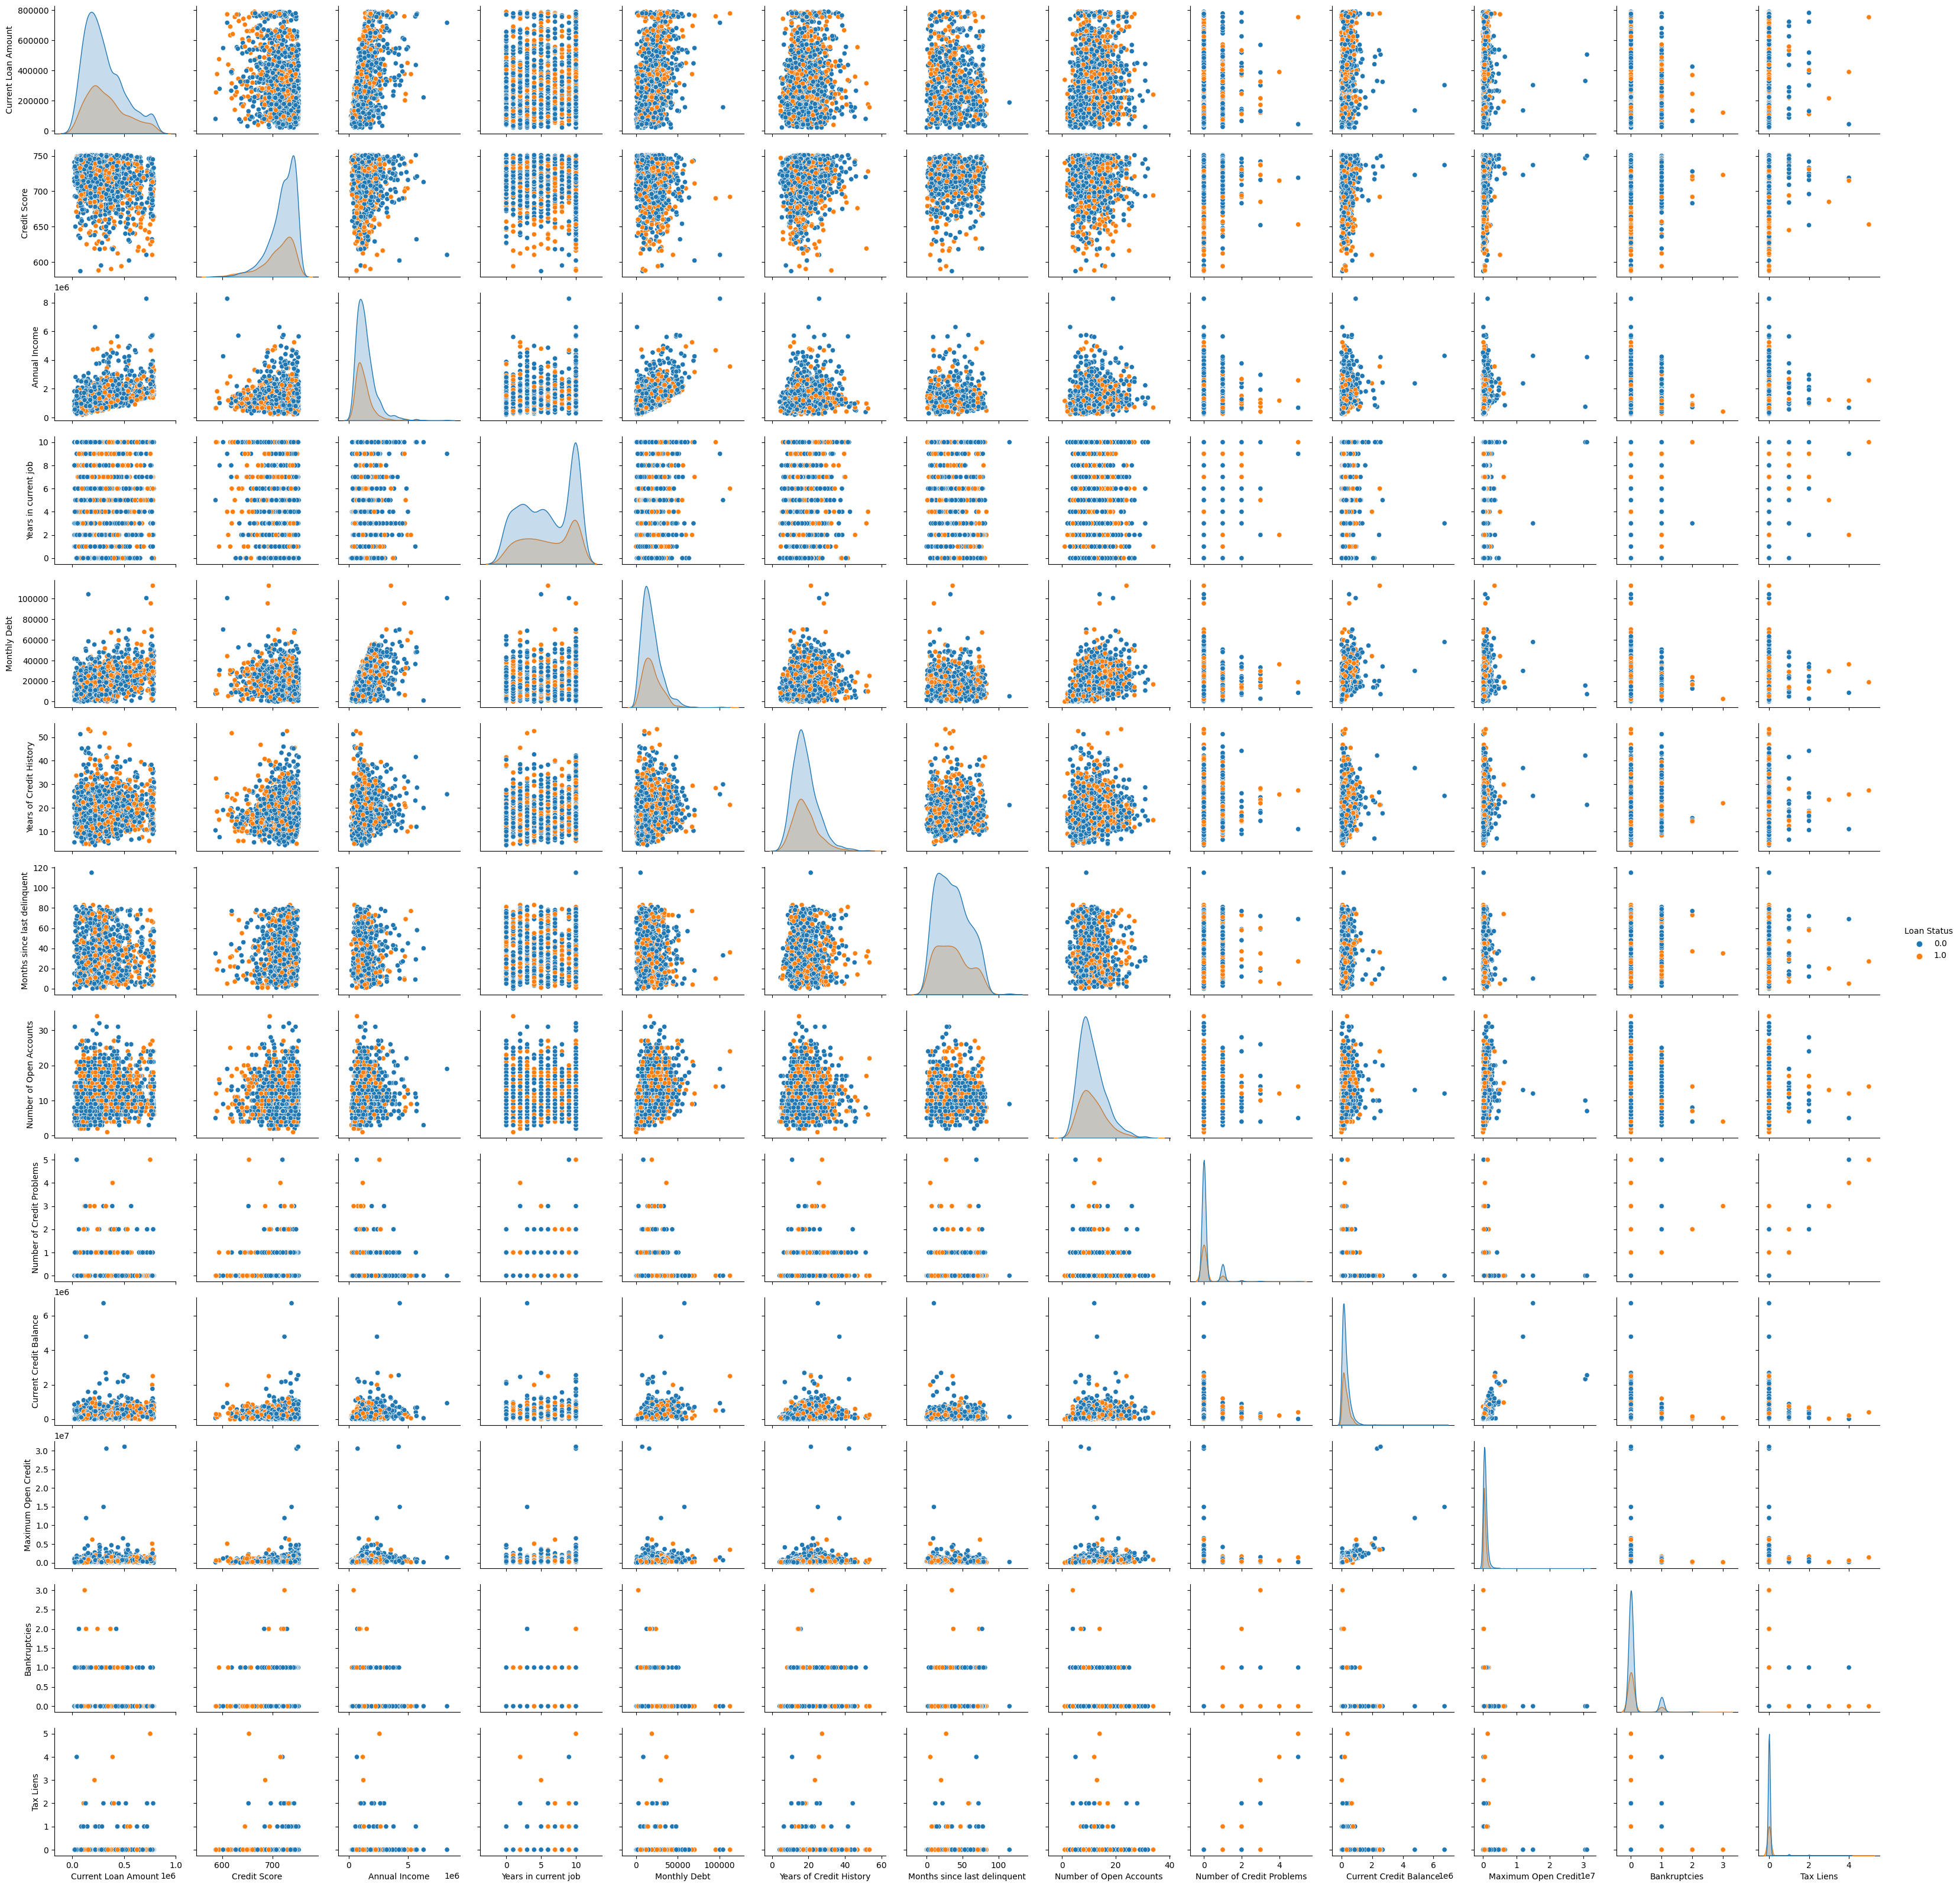

In [312]:
import seaborn as sns

sns.pairplot(df_raw.sample(2000), hue='Loan Status')

Inspect if training data is imbalanced

In [313]:
df_raw['Loan Status'].value_counts()

0.0    51455
1.0    22639
Name: Loan Status, dtype: int64

Having understood the data a little bit, we would like to evaluate the performance of LightGBM model without any extra tunings.

In [428]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, f1_score

skf = StratifiedKFold(n_splits = 5, shuffle = True)
lgb_clf=LGBMClassifier(objective = 'binary', n_jobs = -1)

X = df_raw.copy().drop(['Loan ID', 'Customer ID', 'Loan Status'], axis=1)
y = df_raw['Loan Status'].copy().reset_index(drop=True)

def eval_AUC(mdl, features, labels):
    """
    Fits model and report AUC Score and Accuracy
    """
    AUC_Scores, ACC = [], []
    for train_index, test_index in skf.split(features, labels):
        X_train, X_test = features.iloc[train_index,:], features.iloc[test_index,:]
        y_train, y_test = labels[train_index], labels[test_index]
        mdl.fit(X_train, y_train)
        y_pred = mdl.predict(X_test)
        AUC_Scores.append(roc_auc_score(y_test, lgb_clf.predict_proba(X_test)[:,1]))
        ACC.append(f1_score(y_test, y_pred, average= "micro"))

    AUC_Scores, ACC = np.array(AUC_Scores), np.array(ACC)
    print(f'== {mdl.__class__.__name__} cross validation scores ==')
    print(f'AUC.       AVG: {round(AUC_Scores.mean()*100,2)}% MIN: {round(AUC_Scores.min()*100,2)}% MAX: {round(AUC_Scores.max()*100,2)}%')
    print(f'Accuracy.  AVG: {round(ACC.mean()*100,2)}% MIN: {round(ACC.min()*100,2)}% MAX: {round(ACC.max()*100,2)}%')

eval_AUC(lgb_clf, X, y)

== LGBMClassifier cross validation scores ==
AUC.       AVG: 67.28% MIN: 67.01% MAX: 67.45%
Accuracy.  AVG: 71.19% MIN: 70.98% MAX: 71.42%


#### Feature Engineering

Now, the accuracy does not look much better than approving all loan applications (that would be 69.45% accuracy). Maybe we can try to understand the data a little bit more and extract some useful information out of it.

A common metric to evaluate a customer's repayment ability is Debt-Servicing-Ratio (DSR).

In [435]:
df_processed = df_raw.copy()

In [436]:
df_processed['DSR'] = df_processed['Monthly Debt']/(df_processed['Annual Income']/12)
df_processed['DSR'].sort_values().unique()

array([0.00000000e+00, 9.87946212e-05, 9.98006433e-05, ...,
       4.00000000e-01, 4.00000000e-01,            nan])

So the bank only approved loans with DSR up to 40%. We can also try to derive other metrics which are asset based, such as Loan-To-Value Ratio (LVR). For this particular data set, property value is not visible, so we will include what we have - net loan amount ($Current_Loan_Amount - $Current_Credit_Balance) relative to $Annual_Income. The writer prefers to call it net repayment period. It should be noted that credit balance is liquid and unsecured thus might not be as useful for risk assessment. 

In [437]:
df_processed['Net Loan Amount'] = df_processed['Current Loan Amount'] - df_processed['Current Credit Balance']
df_processed['Repayment Period'] = df_processed['Current Loan Amount'] / df_processed['Annual Income']
df_processed['Net Repayment Period'] = df_processed['Net Loan Amount'] / df_processed['Annual Income']

Let's try to evaluate again.

In [438]:
X = df_processed.copy().drop(['Loan ID', 'Customer ID', 'Loan Status'], axis = 1)
y = df_processed['Loan Status'].copy().reset_index(drop = True)

eval_AUC(lgb_clf, X, y)

== LGBMClassifier cross validation scores ==
AUC.       AVG: 67.54% MIN: 66.78% MAX: 68.19%
Accuracy.  AVG: 71.23% MIN: 71.06% MAX: 71.44%


Sadly, there is little improvement over original data. Let us inspect top features.

In [439]:
importances = pd.DataFrame({'feature names': X.columns,
                            'lgb':lgb_clf.feature_importances_})
display(importances.sort_values('lgb',ascending = False))

feature names  lgb
13           Maximum Open Credit  301
2                   Credit Score  280
8        Years of Credit History  237
16                           DSR  225
3                  Annual Income  207
12        Current Credit Balance  205
18              Repayment Period  204
0            Current Loan Amount  185
7                   Monthly Debt  170
9   Months since last delinquent  156
10       Number of Open Accounts  152
19          Net Repayment Period  152
17               Net Loan Amount  133
4           Years in current job  125
6                        Purpose  113
5                 Home Ownership   65
1                           Term   40
11     Number of Credit Problems   20
14                  Bankruptcies   16
15                     Tax Liens   14

#### Hyperparameter tuning

There are only few things we can do to make better predictions. Better data, better understanding of the data, or a better model.

We attempt to employ a state-of-the-art hyperparameter tuning framework, Optuna, to control the behavior of the algorithm and see how much better we can do.

In [440]:
import optuna

def eval_AUC_v2(mdl, features, labels):
    """
    Fits model and output AUC Score only
    """
    AUC_Scores = []
    for train_index, test_index in skf.split(features, labels):
        X_train, X_test = features.iloc[train_index,:], features.iloc[test_index,:]
        y_train, y_test = labels[train_index], labels[test_index]
        mdl.fit(X_train, y_train)
        AUC_Scores.append(roc_auc_score(y_test, mdl.predict_proba(X_test)[:,1]))

    AUC_Scores = np.array(AUC_Scores)

    return AUC_Scores.mean()

def objective(trial):
    """
    Define a black box function that returns a numerical value to be optimized
    """
    lgb_clf = LGBMClassifier(objective = "binary", # the classification outcome is binary
                            n_jobs = -1, # non model related
                            reg_alpha = trial.suggest_float('reg_alpha', 0, 30.0),  # L1 regularization term on weights
                            reg_lambda = trial.suggest_float('reg_lambda', 0, 10.0), # L2 regularization term on weights
                            num_leaves = trial.suggest_int('num_leaves', 2, 256), # Maximum tree leaves for base learners
                            subsample_for_bin = trial.suggest_int('subsample_for_bin', 100000, 300000), # Number of samples for constructing bins
                            min_child_weight = trial.suggest_float('min_child_weight', 0.00001, 1, log=True), # Minimum sum of instance weight (Hessian) needed in a child (leaf)
                            min_child_samples = trial.suggest_int('min_child_samples', 1, 200) # Minimum number of data needed in a child (leaf)
                            )

    return eval_AUC_v2(lgb_clf, X, y)

In [441]:
# To stop optuna from reporting progress
optuna.logging.set_verbosity(optuna.logging.WARNING)

In [442]:
study = optuna.create_study(direction = 'maximize')
study.optimize(objective, n_trials = 500, show_progress_bar = True)

c:\Users\playe\AppData\Local\Programs\Python\Python310\lib\site-packages\optuna\progress_bar.py:56: ExperimentalWarning:

Progress bar is experimental (supported from v1.2.0). The interface can change in the future.



  0%|          | 0/500 [00:00<?, ?it/s]

Plot optimization history.

In [443]:
fig = optuna.visualization.plot_slice(study)
fig.show()

In [444]:
from pprint import pprint

print("Best hyperparameters discovered were")
pprint(study.best_trial.params)
print("")
print("Best AUC was")
print(study.best_trial.value)

Best hyperparameters discovered were
{'min_child_samples': 125,
 'min_child_weight': 0.010575715562998562,
 'num_leaves': 26,
 'reg_alpha': 16.064733414537486,
 'reg_lambda': 7.472593965235624,
 'subsample_for_bin': 100243}

Best AUC was
0.6788335481598693


It seems that most hyperparameters do not make too much of a difference, except $num_leaves.

In [449]:
lgb_clf = LGBMClassifier(objective = 'binary',
                       n_jobs = -1,
                       reg_alpha = study.best_trial.params['reg_alpha'],
                       reg_lambda = study.best_trial.params['reg_lambda'],
                       num_leaves = study.best_trial.params['num_leaves'],
                       subsample_for_bin = study.best_trial.params['subsample_for_bin'],
                       min_child_weight = study.best_trial.params['min_child_weight'],
                       min_child_samples = study.best_trial.params['min_child_samples']
                       )

eval_AUC(lgb_clf, X, y)

== LGBMClassifier cross validation scores ==
AUC.       AVG: 67.77% MIN: 67.66% MAX: 67.9%
Accuracy.  AVG: 71.26% MIN: 71.1% MAX: 71.39%


Althought not shown in the notebook, the AUC actually went up by ~0.5% on average after feature engineering and hyperparameter tuning, and that is nothing to sniff at!

We shall stop our exploration of the dataset here. An interesting direction of further analysis would be to find an optimal cut-off point for loan approval to maximize E(Profit). But since loan interest rate / charge-off loss / loan P&L are not visible to us, it would be hard, if not impossible to do.